<a href="https://colab.research.google.com/github/VitorFRodrigues/Polo_Tech_Americanas/blob/main/Polo_Tech/Modulo_05/Projeto/Projeto_Mod05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das médias de carros brasileiros de 2022 - Tabela FIPE

---

Autores: 
  - George Pontes da Cunha
  - João Estevan Leoncio da Silva Barbosa
  - Matheus Keoma Steinbach
  - Vitor Fernando de Souza Rodrigues
  - Willian Wallace Ribeiro Alves da Silva

e-mails / github: 
  - https://github.com/georgecnha
  - jestevan12@gmail.com / https://github.com/joaoestevanbarbosa
  - keoma.steinbach@gmail.com / https://github.com/matheuskeomas
  - vitorfbaiano@gmail.com / https://github.com/VitorFRodrigues/
  - willianwra09@gmail.com / 

---

## 1.Introdução

Nos últimos anos a Pandemia tem ocasionado grandes estragos em escala global. Seja nas mais diversas áreas, o ser humano passou por grandes adaptações. No setor econômico não foi diferente, grandes cadeias de fornecimento foram paralizadas por um tempo o que acabou ocasionando em atrasos e custos inevitáveis.

Atualmente ainda estamos sentindo dos reflexos nos preços dos itens básicos e volateis. Com o custo dos veículos não foi diferente. A cadeia de produção de materia prima como aço e semicondutores (*chips*) tem elevado o custo final os veículos.

Neste trabalho, vamos analisar o custo dos veículos de acordo com a tabela [FIPE](https://veiculos.fipe.org.br/). Os dados foram retirados semi tratados do [kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil).

## 2.Objetivos

### 2.1.Objetivo Geral

Como objetivo geral, temos a intenção de criar um algoritmo de machine learning (ML) para utilizar das informações dos veículos levantados pela tabela para prever custos de outros.

### 2.2.Objetivo Específico

- Realizar preparação e limpeza dos dados;
- Fazer uma análise exploratória;
- Aplicar função de correlação em busca de features úteis para o algoritmo;
- Criar dois pipelines com algoritmos de ML e realizar comparações entre os mesmos.


## 3.Preparação e Limpeza dos Dados

Vamos iniciar importando os dados e as bibliotecas que serão utilizadas para esta seção.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Os datasets usados estão salvos no github conforme url abaixo.

In [11]:
url = 'https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Projeto/dataset/fipe_2022.csv'

In [13]:
dados = pd.read_csv(url)
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


A descrição dos dados é informada no [Kaggle](https://https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil). A título informativo, segue abaixo descrição básica do que cada coluna (feature) informa:

- ```year_of_reference```: ano de referência da observação, ou seja, o ano a que os dados correspondem.
- ```moth_of_reference```: mês de referência da observação, ou seja, o mês a que os dados correspondem. O preço médio é calculado pela FIPE a cada mês.
- ```fipe_code```: id único correspondente a um modelo para facilitar a busca na página da FIPE.
- ```authentication```: código único que autentica a consulta no site da FIPE.
- ```brand```: marca do carro.
- ```model```: descrição do carro contendo o nome e demais informações descritivas, conforme tabela FIPE.
- ```fuel```: combustível utilizado pelo carro. Alguns dos carros a gasolina são na verdade álcool e gasolina (flex), o que é comum no Brasil.
- ```gear```: a maneira como as marchas são trocadas.
- ```engine_size```: Tamanho do motor em centímetros cúbicos.
- ```year_model```: esses valores correspondem ao ano de referência, podendo não ser iguais ao ano de fabricação, que no caso corresponderá a um ano anterior ao ```year_model```. Observações com ```year_model = year_of_reference``` significam que o carro é do ano de referência, ou seja, um carro 2021 com ```year_of_reference = 2021``` e ```moth_of_reference = July``` significa que a observação (principalmente o preço médio) corresponde a um carro novo do ano de 2021, do mês de julho. O mesmo modelo pode ter um preço médio diferente para meses diferentes.
- ```avg_price_brl```: preço médio do carro, medido pela FIPE, em Real.

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


Conforme visto em informações nas básicas do dataframe, não há dados nulos e temos 7 colunas do tipo objeto e 5 do tipo numéricas. Como tratamento inicial iremos:

1. Remover ```year_of_reference``` por possuir apenas o valor ```2022```;
1. Remover ```fipe_code``` e ```authentication``` por se tratarem de dados do tipo identificadores os quais não serão úteis ao algoritmo ML;
1. Remoção de Outliers das features numéricas.
1. Categorizar ```fuel``` e ```gear``` com a utilização do ```get_dummies```. Estes dados são muito úteis e possuem no máximo 3 valores distintos;
1. Dado alto quantitativo do conjunto (290 mil linhas) vamos escolher uma única marca para nossa análise.

In [18]:
dados_limpos = dados.drop(['year_of_reference', 'fipe_code', 'authentication'], axis=1)
dados_limpos.head()

,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,January,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,January,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,January,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,January,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,January,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [22]:
pd.get_dummies(dados_limpos['fuel'], drop_first=True)

,Diesel,Gasoline
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
290270,0,1
290271,0,1
290272,0,1
290273,0,1


## 4.Análise Exploratória

Importância na remoção dos Outliers

<ipython-input-30-80d09c9e1fda>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


<Axes: title={'center': 'Preços Médios: Box-Plot'}>

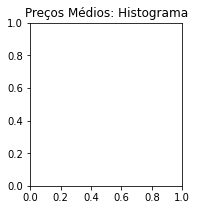

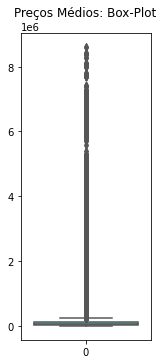

In [30]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title('Preços Médios: Histograma', fontdict={'fontsize':12})
sns.displot(dados.avg_price_brl, color="#40E0D0", kde_kws={'linewidth':3,'color':'b'})

plt.subplot(1,2,2)
plt.title('Preços Médios: Box-Plot', fontdict={'fontsize':12})
sns.boxplot(dados.avg_price_brl, color="#40E0D0")

## 5.Aplicação algoritmos ML

## 6.Conclusões

## 7.Referências

In [1]:
url = 'https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Projeto/dataset/fipe_2022.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDis

In [3]:
dados = pd.read_csv(url)
dados

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
290270,2022,December,061001-1,lzrp3rpklh8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,061001-1,lrfw427w9v5h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,061001-1,lh98rfxnhy18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,061001-1,k9dtwsps5sy1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17


In [4]:
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [6]:
for i in dados.columns.tolist():
  print(f'{i}: {dados[i].unique()}')
  print('')

year_of_reference: [2022]

month_of_reference: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

fipe_code: ['038001-6' '038002-4' '038003-2' ... '005534-4' '005535-2' '005536-0']

authentication: ['vwmrywl5qs' 't9mt723qhz' 'tr5wv4z21g' ... 'lh98rfxnhy18' 'k9dtwsps5sy1'
 'j7gt9020nqvt']

brand: ['Acura' 'Agrale' 'Alfa Romeo' 'AM Gen' 'Asia Motors' 'ASTON MARTIN'
 'Audi' 'Baby' 'BMW' 'BRM' 'CAB Motors' 'Cadillac' 'CBT Jipe' 'CHANA'
 'CHANGAN' 'Caoa Chery' 'GM - Chevrolet' 'Chrysler' 'Citroën'
 'Cross Lander' 'Daewoo' 'Daihatsu' 'Dodge' 'EFFA' 'Engesa' 'Envemo'
 'Ferrari' 'Fiat' 'Fibravan' 'Ford' 'FOTON' 'Fyber' 'GEELY' 'GREAT WALL'
 'HAFEI' 'Honda' 'Hyundai' 'Isuzu' 'IVECO' 'JAC' 'Jaguar' 'Jeep' 'JINBEI'
 'JPX' 'Kia Motors' 'Lada' 'Land Rover' 'Lexus' 'LIFAN' 'LOBINI' 'Lotus'
 'Mahindra' 'Maserati' 'Matra' 'Mazda' 'Mclaren' 'Mercedes-Benz' 'Mercury'
 'MG' 'MINI' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth' 'Pontiac'
 'Porsche

In [7]:
dados.brand.value_counts().head(50)

GM - Chevrolet     28179
VW - VolksWagen    28142
Fiat               26563
Ford               24150
Mercedes-Benz      17470
Renault            15194
Audi               12168
Peugeot            11132
Toyota             10309
Mitsubishi         10182
BMW                10060
Citroën             8780
Hyundai             7485
Land Rover          6973
Nissan              6885
Porsche             6800
Volvo               6069
Honda               5710
Kia Motors          5473
Subaru              4138
Suzuki              3867
Jeep                3656
Jaguar              2788
MINI                2352
Chrysler            1824
Lexus               1749
Caoa Chery          1583
Maserati            1367
Dodge               1206
SSANGYONG           1174
JAC                 1103
IVECO                991
Agrale               960
Fibravan             921
Ferrari              852
EFFA                 820
Troller              765
BRM                  630
Baby                 580
Alfa Romeo           504


In [8]:
dados.query("brand == 'Ferrari'")['model'].value_counts().count()

23

## Roteiro de itens 

- plot preços versus tipo de comb
- plot preços versus tipo de marcha
- plot preços versus tamanho
- random undersampling
- Utilizar Marca JAC para fazer o modelo
- Dropar 
